In [1]:
import animation
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# CW08 Examples

This notebook is intended as a gallery of useful examples and functionality, to reinforce what we have been doing in the class so far.

Go through the examples and corresponding code, and see if you can understand what is happening. Discuss with your group.

Feel free to create new code in new cells to play with the ideas further, which can help you understand. Save your updated notebooks and turn them in if you do so.

## Language-specific Cells

You can change which kernel evaluates individual cells in Jupyter, which can be useful for quick demonstrations. For example, the cell below has been switched to `bash` instead of the default `python3` kernel being used for the rest of the notebook.

In [2]:
%%script bash

# The line above acts exactly as the #!/bin/bash line of a script file
# It tells Jupyter that you are running a script, and which interpreter to use for the script

acc=0
acc2=1
for i in $(seq 20); do
  echo $acc
  tmp=$acc2
  acc2=$(($acc2 + $acc))
  acc=$tmp
done

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [3]:
%%script octave

# For example, this script is now in Octave, a free clone of MATLAB
# Next week, we will be looking into using MATLAB itself
# Note in the code below that the function names look very similar to numpy
# The similarity of numpy to MATLAB is deliberate - you will be able to use most of
# the syntax you are familiar with from numpy with only a few minor tweaks

e = zeros(10,10);           # 10x10 matrix of zeros
v = linspace(0,1,10);       # vector of length 10 storing domain of points between 0 and 1
e(2:end,1:end-1) = -eye(9); # Set lower off-diagonal to -1 using 9x9 identity matrix
e(1:end-1,2:end) += eye(9)  # Set upper off-diagonal to +1 using 9x9 identity matrix, do not suppress output

e =

   0   1   0   0   0   0   0   0   0   0
  -1   0   1   0   0   0   0   0   0   0
   0  -1   0   1   0   0   0   0   0   0
   0   0  -1   0   1   0   0   0   0   0
   0   0   0  -1   0   1   0   0   0   0
   0   0   0   0  -1   0   1   0   0   0
   0   0   0   0   0  -1   0   1   0   0
   0   0   0   0   0   0  -1   0   1   0
   0   0   0   0   0   0   0  -1   0   1
   0   0   0   0   0   0   0   0  -1   0



octave: X11 DISPLAY environment variable not set
octave: disabling GUI features


## Matplotlib Animations

Recent versions of matplotlib have now enabled easy creation of plot animations. Below I highlight two distinct animation modes, using the code from the supplementary module `animation.py`.

### HTML5 MP4 Video Rendering

First we define a generator that yields new frames for the animation. We define a frame to be the updated range for the plot, seeding the generator with the constant domain. For simplicity, we will show a Gaussian wave packet.

In [4]:
def wave_packet(x):
    for i in range(100):
        yield 10*np.sin(2*np.pi*(x - 0.01*i))*np.exp(-x**2/2)

Now, using the code in the helper module, we plot the wave packet, choosing a domain of points $x\in(-4,4)$.

In [5]:
animation.plot_anim(wave_packet,xlim=(-4,4),title="Gaussian Wave Packet",xlabel="x",ylabel="g(x)")

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADt5G1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAACMuZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAADAAADAAChIqB7aCCkyPQAAAMAATo2T/gc
P5gG0MDJOAwGTjdPv0ArbHd4Z0vRiiUA2jVtBGMJO5yNmTubTrp+GwHUh+nT0UClAOMlfZ56XkRC
8pkOR4xl/QW6xAEH4XEhbeZGwMSSAwLtuxOG/XmDpRanJicRuWksTAB1ZJDI3vZcVPbnYsv2yjzD
UyzumBEuXVPRQfvmjFzxbjqtn9Si9wWJH1ap+wB9bFPstRxsvPJHWL0RTfnOPTy9/ckV8ZfSWyuN
hoMhDNiqv51NMPqBMhqGgyrCsAhElJP0nLj9hH48OVhUTKJDtaFMtuS+Pml5XYnPJc5Fcd0fciUa
DheUQQqfxg02aCKiuQmPkWaQaR3WS7oNTI67dIN320n5wuDeu5D23+CbVSuVPdRwkOwirJysmQ+X
umsSi3MvJX7zyXimqreYvHnsE3arNxAKkxaFgCQJ37QnJGxyDA00uZQVVnkvqfsbBPV4Nph53qK4
fliyjdWTaPXvkmgrQxy282YNUV2s5o9j7fGDBjae/f9taDJcFdyw6Bl38dbJKXBvfXvRJrprwSCQ
gSwI3dJJLUsx7aFadeVTtzfd6yMfncsLiVlRHfsfow5i/XJ1qkKzsxZbTksz6aL5FjFYgWBzyKQC
+v5WyxjwTX/xi/IjHczS3wfMVLrVVYc12fjX3D91GRse9i1NUXnSrXLxYLzzwRTLwlpHlt6BWZOZ
3HRI4vN8jKhHRZcIaIe3nwx8HIh9bhEo6mvIOHrPIpZZ8JYMoX7rgjzjgp+WA1yZUhT04by1RkAC
zs9z4pUGEhRb4SwntAfWqnh+S++snr7kw2nU0ow8NxWGbKh5kvThlHvFEqDXVUtQXaZNcYM8/Ner
VwjMTmepZNPQq1LSgYhYK6CIcYyv2lFz+eSUk7VQrCzTNuiUWKStlyrkshjT6x93QluafPmIfj2N
w9oZY/iG3cGAbCOtuPMpP7xGy32SIW4SKS/nFWrzXN5z7HLrEuMJXio9HY6OJX8lDC99EJv8rqZd
uPEoPs+sTihSpC8z/0iDz7OyimR5YT1y3nL2o0ghEHQCXbtmFBnHUUo3jwdMK++BEUG+BGFCusIH
glrm1c1Z+B56kGgd1MxAOAfqgcTArXOldu0aH/tXLCLF4gsoAigbM9J2p8Q6RDkPHMRMXX9COz+B
0VmsrREAruTLuwg52Y5M0Oe9zOx/KHH6msZMTry380Ln47wdk9BjAn7CKMaKGqa50zB21HVgdmoz
PNfViBRJiKkSApy6Oq4XQpGQjDOp44N2q7emtXmiYOXpqle8LE3v4MwuvMnVi0nfXQfu4KvuTUJQ
DYt4O+kHt7TNlHZZf2LbrKMoGDsRSIsCH0N4t+DUkHsEXFncWn+lljVrXRiNGum5diOThM7AX1uK
WJvzwJJ4tX/hC9C664GxAMLaGDxrkkH5IMweeJVCIHzoAGejBuY3fkjIioAQ8vUOH3np7iJHdKf8
69adcvwkuQny7qsRIJhePdIH0Y6wk0YdF+gp0kItkONWvXTSnbJWfab7UAI8kj3ih/dZEdkMTmfW
t9Qyhe5du6pcfgl9UDwqTpBMJf1oLCGybBN5BLKYE5VAAOE1UlNNVoX/bhtr7nhfAWCKm+LtLHCW
CypHFb6VICIDBr1x3Y+h2OAxxljLhbFeSCAAAAMD8pNpgHemKkJSDy6g1pMTGI0kIo/7QB03n+Hr
pz6OfSXB02xUUFGhOO668hFrQm6aw0egedSYQYZAoXjwcmdW9+TV21+DRqZohf5cbiwrFq/qrWQv
t80XhDROfe/gC3lLlQJt6Urjnx3BBTuuf6EYW28T8/IDI0+YasoXHW+XygKfuhHorYvUAFO8W2nx
mGz6SN40DJdRiY8t4TazShNDdUjm4KL6EQbr/5EEp2Snt6QdCtiMlb10AsPul943g6wsox8Rfbrk
va108hje9xX/OlkrNi8rb/quehkf+K4ivYBP2a1SlFUeWRdKw44smKEbN2k+sa5JlIaGSQlnsSXM
nr+txi3K+TwzHER+pJGN6Qx7M5jy0Wl4wsdRZJFM4gL/kJUxLwveJINP+8e06ILoVH7wyDWK/Ug2
JXYqmvds3o32YQtkVBEGYfgAAit7yKK4Cnkgl2P4++0TFdug1VQnYw12oVqlDDtZVPR9U3MeygZL
LOdlERJ6vELx4d8cw6GVpcm/3BdCFl9u6UznazehvEpJx8pKYqvwiqgo0ireuGH8TubRuSO3acAG
fV9RgHgxaqkdk7+/VvgHjCJw5t2wWQDfOangdwsSyD8bGbq+5/2KJ7pFucCpzEoQwWhJhBSQFtLL
OFUm36e01QEl2QcYUqJoOauQpdvm0ERzp4GVzu9m8+ULgEcZhWTPGos2thr/goRXRXfvAfK6jgja
aeDZQ0Uf9gdGZILtXPR2pOCqmrsCt0PKnVsIJBEVGzpo0N2vkNoijIM1HovUBYvJkTMDkJRe1gW3
EvgA0GJMqo7432yKW2vrX3Nvu4p/UnG7GTIQu6NZTzEPoHfCiulX/+//8XAN8gXimGlMW8EZ2dB8
raCNFQEizIw3W7SvvQuPRzC/nMtB5K1EKLqzPCXqJS7S6sszu1fmkTcBOUf7x4lLKZ+OdEP/jcyo
+FdIszePCVCIJF6XLt8TPh3tEGgqKOVIxjp/zbcnoLermWFRKCzLZkLU1/sVyX3yPo2FoctlNuOQ
t1bvDruPW2CvWaITLihvXWzPBKHO4Sy9lE//RMTYBiKFzG49MdGVvE5cX9Xn36hZ5YHjrEqTAVSz
mKW2rm5boFAPMNrypaOsEd77coF4iO/4OT41lUEalCR2tyRaM+fxjlAo74HJvKlGM+SVhPif/VRf
k+3g7AACizanGKFdse6DM

The plot then renders as an MP4 video directly inside the notebook using an HTML5 wrapper. You can play, pause, and fullscreen the animation, as well as download it as a compressed mp4 file.

### Animated GIF File Output

Alternatively, you can have matplotlib directly save an animated gif file. These are nice for web display, but are not optimized in filesize by default.  As a test below, we define a sinc fuction, but animate the drawing of the sinc one point at a time for visual effect.  The file will be output to `draw_sinc.gif` in the same directory as the notebook.

In [6]:
def draw_sinc(x):
    y = np.zeros_like(x)
    for ind in range(len(x)):
        y[ind] = 1 if x[ind]==0 else np.sin(x[ind])/x[ind]
        yield y

In [7]:
animation.plot_anim(draw_sinc,xlim=(-15*np.pi,15*np.pi),n=200,delay=10,ylim=(-0.5,1),title="Sinc Function",xlabel="x",ylabel="sinc(x)",gif=True)

## SymPy (Symbolic Python)

Symbolic python aims to reproduce the functionality of Mathematica completely within python. This means that it can perform symbolic manipulations of expressions, including automatic algebraic simplification.

In [8]:
sym.init_printing()        # Tell sympy to use the prettiest printing available (e.g., LaTeX)
x,y,z = sym.symbols('x y z')   # Define the variables x and y to be mathematical variable symbols
f,g = sym.symbols('f g', cls=sym.Function)  # define the variables f and g to be mathematical function symbols

Expand $(x+y)^3$:

In [9]:
sym.expand((x+y)**3)

Factor $x^2 + 2xy + y^2$:

In [10]:
sym.factor(x**2 + 2*x*y + y**2)

Differentiate: $\frac{d}{dy}(x+y)^3$

In [11]:
sym.diff((x+y)**3, y)

Differentiate: $\frac{d^3}{dy^2dx}(x+y)^3$

In [12]:
sym.diff((x+y)**3, y, 2, x)

Integrate: $\int_{-\infty}^\infty e^{-x^2}dx$

In [13]:
sym.integrate(sym.exp(-x**2),(x,-sym.oo,sym.oo))  # Note that sym.oo is infinity

Solve algebraic equation: $x^3 = 1$

In [14]:
sym.solve( sym.Eq(x**3,1) )

Solve (damped Harmonic Oscillator) differential equation: $f''(x) + z f'(x) + y^2 f(x) = 0$

In [15]:
diffeq = sym.Eq(f(x).diff(x,x) + z * f(x).diff(x) +  y**2 * f(x), 0)
diffeq

In [16]:
sym.dsolve(diffeq, f(x))

Define a Gaussian function, take its derivative and integral symbolically, then convert them to numerical versions that use numpy:

In [17]:
gaussexp = sym.exp(-x**2/2)/sym.sqrt(2*sym.pi)
gaussdiffexp = gaussexp.diff(x)
gaussintexp = sym.integrate(gaussexp, (x, -sym.oo, x))

$g(x) = $

In [18]:
gaussexp

$\frac{d}{dx}g(x) = $

In [19]:
gaussdiffexp

$\int_{-\infty}^x g(x')dx' = $

In [20]:
gaussintexp

In [21]:
# If functions are known to numpy, just replace them with numpy versions
gauss = sym.lambdify(x, gaussexp)
dgaussdx = sym.lambdify(x, gaussdiffexp)
# Erf (error function) is not known to numpy, so evaluate it pointwise explicitly
intgauss = np.vectorize(lambda x0: gaussintexp.replace(x,x0))

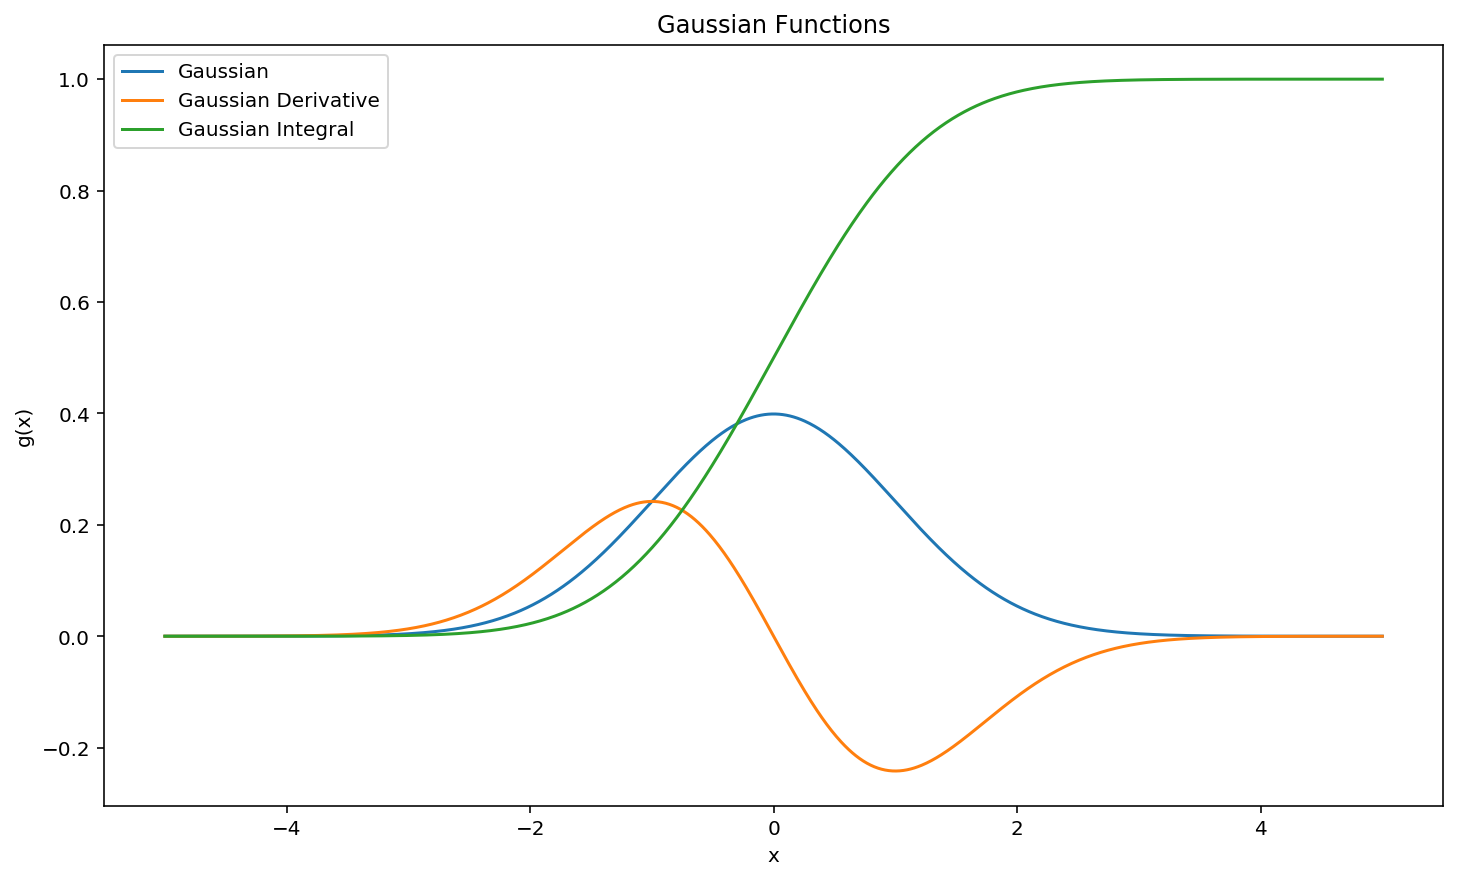

In [22]:
xnp = np.linspace(-5,5,1000)
plt.plot(xnp, gauss(xnp), label="Gaussian")
plt.plot(xnp, dgaussdx(xnp), label="Gaussian Derivative")
plt.plot(xnp, intgauss(xnp), label="Gaussian Integral")
plt.title("Gaussian Functions")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()